In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [2]:
Re = 102500
n_modes = 10

mat = scipy.io.loadmat('D:\Documents\Year 3\FEEG3003 - IP\github_repo\A10PIVuv.mat')
data = list(mat.items())

u = data[7]
u_mean = data[9]
v = data[8]
v_mean = data[10]
x = data[11]
y = data[12]
ts = data[3][1][0][0] # time step between snapshots
print(np.shape(u), u[0], np.shape(u_mean), u_mean[0], np.shape(v), v[0], np.shape(v_mean), v_mean[0])

samples = len(u[1])             # number of snapshots in input data
h = len(u[1][1][1])             # height of matrix = y
l = len(u[1][1])                # length of matrix = x
h_trunc = 35                    # y truncation for input data
l_trunc = 150                   # x truncation for input data
t_trunc = samples                 # number of time snapshots for SVD

print(samples, h, l)

(2,) u (2,) u_mean (2,) v (2,) v_mean
3499 66 186


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


10 5


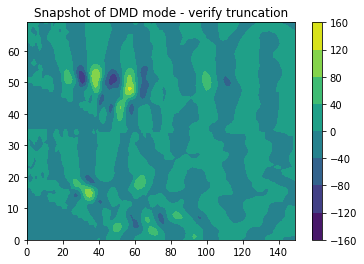

In [3]:
with open("dmd_10_F.csv", mode='r') as csvfile:
    data = csv.reader(csvfile)
    dmd = list(data)
with open("dmd_F_10_freqs.csv", mode='r') as csvfile:
    data = csv.reader(csvfile)
    freqs = list(data)
    
len_d = int(len(dmd)/2) #number of modes (dmd, pod in that order) from data
print(len_d, len(freqs))
Z = []

for j in range(0,int(len_d)):
    #manipulating modes so datasets are spatially aligned
    #print(np.shape(dmd[0]))
    d_temp = np.reshape(dmd[len(dmd)-2-j*2],(h_trunc*2,l_trunc))
    Z.append(d_temp.astype(float))
    
fig, ax = plt.subplots()
cs = ax.contourf(Z[1])
ax.set_title('Snapshot of DMD mode - verify truncation')
fig.colorbar(cs, ax=ax)
plt.plot()
fig.canvas.draw()

150
35


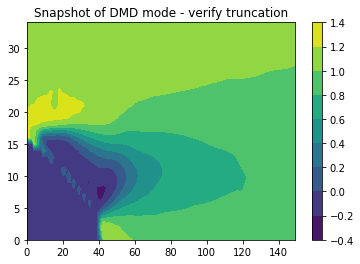

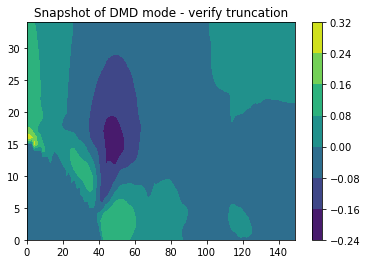

In [4]:
xs = []
for i in range(0, l_trunc):
    xs.append(x[1][i][1])
print(len(xs))
ys = y[1][1][0:(h_trunc)]
print(len(ys))

X_avg = np.rot90(u_mean[1][0],3)
X_avg = np.delete(X_avg, np.s_[h_trunc::], 0) # from top left, slice row 0:h. Parameter of 0 in np.delete defines rows
X_avg = np.delete(X_avg, np.s_[0:l-l_trunc], 1) # from top left, slice column 0:l. Parameter of 1 in np.delete defines columns

Y_avg = np.rot90(v_mean[1][0],3)
Y_avg = np.delete(Y_avg, np.s_[h_trunc::], 0) # from top left, slice row 0:h. Parameter of 0 in np.delete defines rows
Y_avg = np.delete(Y_avg, np.s_[0:l-l_trunc], 1) # from top left, slice column 0:l. Parameter of 1 in np.delete defines columns

fig, ax = plt.subplots()
cs = ax.contourf(X_avg)
ax.set_title('Snapshot of DMD mode - verify truncation')
fig.colorbar(cs, ax=ax)
plt.plot()
fig.canvas.draw()

fig, ax = plt.subplots()
cs = ax.contourf(Y_avg)
ax.set_title('Snapshot of DMD mode - verify truncation')
fig.colorbar(cs, ax=ax)
plt.plot()
fig.canvas.draw()

(1, 35, 150) (1, 35, 150)
(1, 35, 150) (1, 35, 150)


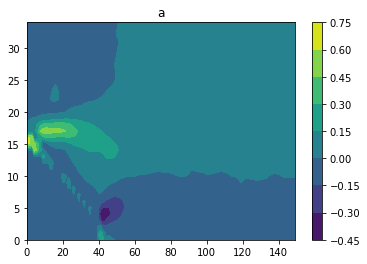

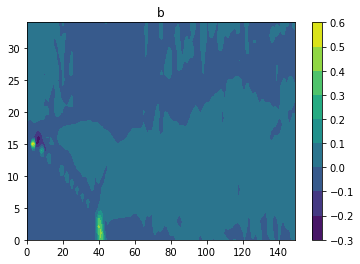

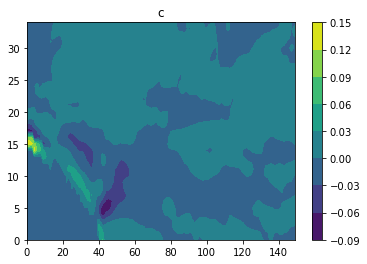

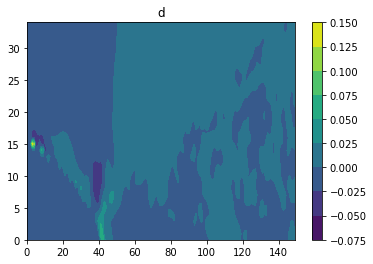

In [5]:
dU1x1 = []
dU1x2 = []
dU2x1 = []
dU2x2 = []

[a,b] = np.gradient(X_avg.astype(float))
dU1x2.append(a)
dU1x1.append(b)
print(np.shape(dU1x2), np.shape(dU1x1))


[c,d] = np.gradient(Y_avg.astype(float))
dU2x2.append(c)
dU2x1.append(d)
print(np.shape(dU2x2), np.shape(dU2x1))

fig, ax = plt.subplots()
cs = ax.contourf(a)
ax.set_title('a')
fig.colorbar(cs, ax=ax)
plt.plot()
fig.canvas.draw()
fig, ax = plt.subplots()
cs = ax.contourf(b)
ax.set_title('b')
fig.colorbar(cs, ax=ax)
plt.plot()
fig.canvas.draw()
fig, ax = plt.subplots()
cs = ax.contourf(c)
ax.set_title('c')
fig.colorbar(cs, ax=ax)
plt.plot()
fig.canvas.draw()
fig, ax = plt.subplots()
cs = ax.contourf(d)
ax.set_title('d')
fig.colorbar(cs, ax=ax)
plt.plot()
fig.canvas.draw()

In [6]:
n = 0
print(np.shape(dU2x1[n]),np.shape(np.transpose(np.matrix(dU2x1[n]).getH())))

(35, 150) (35, 150)


(5, 35, 150)


D:\Anaconda3\lib\site-packages\numpy\ma\core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
D:\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: ComplexWarning: Casting complex values to real discards the imaginary part
  self.levels = np.asarray(levels_arg).astype(np.float64)


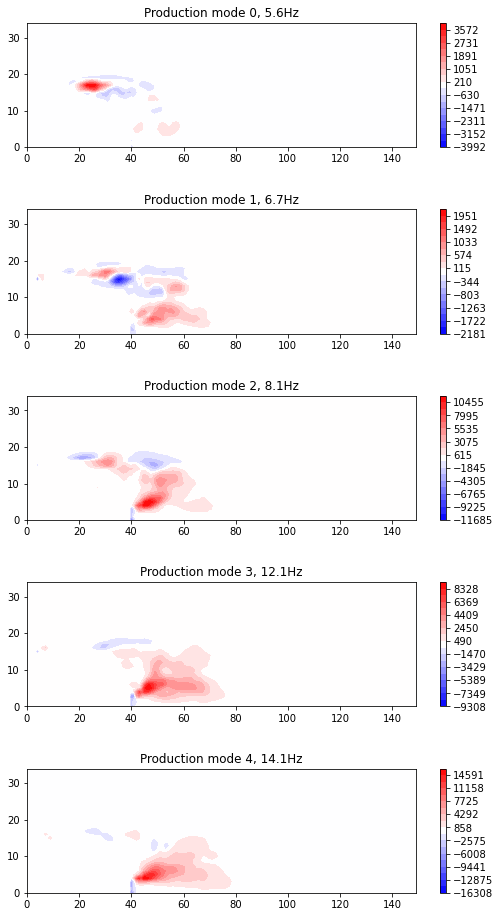

In [7]:
#print(np.shape(dU1x1), np.shape(u1), np.shape(u2))
Production = [] #Production for each mode
Production_max = []
Prod_total = np.zeros([h_trunc, l_trunc])
real = []
imag = []

for i in range(0, int(len_d/2)):
    real.append(np.vsplit(Z[i], 2)) #real V, U components
    imag.append(np.vsplit(Z[int(len_d/2)+i], 2)) #imaginary V, U components
    DMD_pos_conj = np.vectorize(complex)(real[i][0], imag[i][0]) # X, u1
    DMD_neg_conj = np.vectorize(complex)(real[i][1], imag[i][1]) # Y, u2
    
    Production.append(
        -np.multiply((np.multiply(np.transpose(np.matrix(DMD_pos_conj).getH()), DMD_pos_conj) + np.multiply(DMD_pos_conj, np.transpose(np.matrix(DMD_pos_conj).getH()))),dU1x1[0])
        -np.multiply((np.multiply(np.transpose(np.matrix(DMD_pos_conj).getH()), DMD_pos_conj) + np.multiply(DMD_pos_conj, np.transpose(np.matrix(DMD_neg_conj).getH()))),dU1x2[0])
        -np.multiply((np.multiply(np.transpose(np.matrix(DMD_neg_conj).getH()), DMD_pos_conj) + np.multiply(DMD_neg_conj, np.transpose(np.matrix(DMD_pos_conj).getH()))),dU2x1[0])
        -np.multiply((np.multiply(np.transpose(np.matrix(DMD_neg_conj).getH()), DMD_neg_conj) + np.multiply(DMD_neg_conj, np.transpose(np.matrix(DMD_neg_conj).getH()))),dU2x2[0])
                      )
    
    Production_max.append(max(Production[i].max(),-Production[i].min()))

fig, axes = plt.subplots(int(len(freqs)), 1, figsize = (10,16))
plt.set_cmap("bwr")
n = 0
for ax in axes.flat:
    levels = np.linspace(-Production_max[n], Production_max[n], 20)
    cs = ax.contourf(Production[n], levels=levels)
    ax.set_title('Production mode ' + str(n) + ', ' + str(round(float(freqs[n][0]),1)) + 'Hz')
    fig.colorbar(cs, ax=ax)
    n = n+1

fig.subplots_adjust(hspace = 0.5)
fig.subplots_adjust(right=0.8)

plt.plot()
print(np.shape(Production))
#    fig, ax = plt.subplots()
#    levels = np.linspace(-Production_max[i], Production_max[i], 100) # Scale plot levels
#    cs = ax.contourf(Production[i], levels = levels)
#    ax.set_title('Production mode ' + str(i) + ', ' + str(round(float(freqs[i][0]),1)) + 'Hz')
#    fig.colorbar(cs, ax=ax)
#    plt.plot()
#    fig.canvas.draw()

[25852.535825465304, 36735.35847889412, 582738.4225576799, 806065.7391710029, 1190019.5843930915]


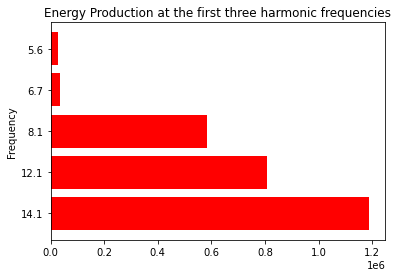

In [8]:
Production_sum = []
for i in range(0, len(freqs)):
    Production_sum.append(Production[i].sum().real)
print(Production_sum)

ind = []
for i in range(0,len(freqs)):
    ind.append(str(round(float(freqs[i][0]),1)))

x=range(len(freqs))

plt.figure()
plt.ylabel('Frequency')
plt.title('Energy Production at the first three harmonic frequencies')
plt.barh(ind,Production_sum,color='r')
plt.gca().invert_yaxis()

np.savetxt('Production Energy 10deg.csv', Production_sum, delimiter = ',')

fig, ax = plt.subplots()
cs = ax.contourf(Prod_total)
ax.set_title('Production sum over dataset')
fig.colorbar(cs, ax=ax)
plt.plot()
fig.canvas.draw()

In [9]:
Prod_total = np.zeros([h_trunc, l_trunc])
print(np.shape(Prod_total), np.shape(Production[0]))
for i in Production:
    Prod_total = np.add(Prod_total, Production[i])

(35, 150) (35, 150)


TypeError: only integer scalar arrays can be converted to a scalar index